# Hebrew letter identification based on MNIST Dataset

In [1]:
!pip install tensorflow opencv-python pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 9.3 MB/s eta 0:00:0000:0100:01m


# Segmenting layers from the image

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('hebrew_letter_model.keras')

# Class names for Hebrew letters and stop symbol
class_names = ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']

# Preprocess the image: convert to grayscale, apply thresholding, and find contours
def preprocess_and_find_contours(image_path):
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to isolate letters
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find contours of the letters
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return img, contours

# Extract individual letters, classify them, and annotate the image
def classify_and_annotate_image(image_path, model, class_names):
    # Preprocess the image and find letter contours
    img, contours = preprocess_and_find_contours(image_path)

    detected_letters = []  # To store identified letters with coordinates and probabilities

    for contour in contours:
        # Get the bounding box of each contour (x, y, width, height)
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the letter region from the image
        letter_image = img[y:y+h, x:x+w]

        # Resize the letter to match model input size
        letter_image_resized = cv2.resize(letter_image, (64, 64))

        # Convert to array and normalize
        letter_image_array = np.expand_dims(letter_image_resized, axis=0) / 255.0

        # Predict the letter and probability
        predictions = model.predict(letter_image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_letter = class_names[predicted_class]
        probability = np.max(predictions)

        # Store detected letter info (letter, coordinates, probability)
        detected_letters.append({
            'letter': predicted_letter,
            'coords': (x, y, w, h),
            'probability': probability
        })

        # Annotate the image with the bounding box and predicted letter
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f'{predicted_letter} ({probability:.2f})', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return img, detected_letters

# Load and process the image
image_path = 'sample_image.png'  # Replace with your image path
annotated_img, detected_letters = classify_and_annotate_image(image_path, model, class_names)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the detected letters with their coordinates and probabilities
for letter_info in detected_letters:
    print(f"Letter: {letter_info['letter']}, Coordinates: {letter_info['coords']}, Probability: {letter_info['probability']:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('hebrew_letter_model.keras')

# Class names for Hebrew letters and stop symbol
class_names = ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']

# Preprocess the image: convert to grayscale, thresholding, and find contours
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for better letter isolation
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Detect lines using horizontal projections or contours
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=2)

    # Find contours for each line
    contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return img, contours

# Process each line individually
def process_line(image, line_contour, model, class_names):
    x, y, w, h = cv2.boundingRect(line_contour)
    line_image = image[y:y+h, x:x+w]

    # Further segment letters in the line
    gray_line = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
    _, thresh_line = cv2.threshold(gray_line, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh_line, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_letters = []

    for contour in contours:
        # Get bounding box for each letter
        lx, ly, lw, lh = cv2.boundingRect(contour)
        letter_image = line_image[ly:ly+lh, lx:lx+lw]

        # Resize the letter image for model input
        letter_image_resized = cv2.resize(letter_image, (64, 64))
        letter_image_array = np.expand_dims(letter_image_resized, axis=0) / 255.0

        # Predict the letter
        predictions = model.predict(letter_image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_letter = class_names[predicted_class]
        probability = np.max(predictions)

        # Store the letter info (letter, coordinates, probability)
        detected_letters.append({
            'letter': predicted_letter,
            'coords': (x + lx, y + ly, lw, lh),  # Global coordinates on original image
            'probability': probability
        })

    return detected_letters

# Annotate and highlight letters on the image
def annotate_image(image, detected_letters):
    for letter_info in detected_letters:
        x, y, w, h = letter_info['coords']
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, f'{letter_info["letter"]} ({letter_info["probability"]:.2f})',
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Main function to process image line by line
def process_image_line_by_line(image_path, model, class_names):
    img, line_contours = preprocess_image(image_path)
    all_detected_letters = []

    # Process each line separately
    for line_contour in line_contours:
        detected_letters = process_line(img, line_contour, model, class_names)
        all_detected_letters.extend(detected_letters)

    # Annotate the original image with detected letters
    annotated_image = annotate_image(img, all_detected_letters)

    return annotated_image, all_detected_letters

# Load and process the image
image_path = 'sample_image.png'  # Replace with your image path
annotated_img, detected_letters = process_image_line_by_line(image_path, model, class_names)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print detected letters with coordinates and probabilities
for letter_info in detected_letters:
    print(f"Letter: {letter_info['letter']}, Coordinates: {letter_info['coords']}, Probability: {letter_info['probability']:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━

IndexError: list index out of range

# Include excel output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

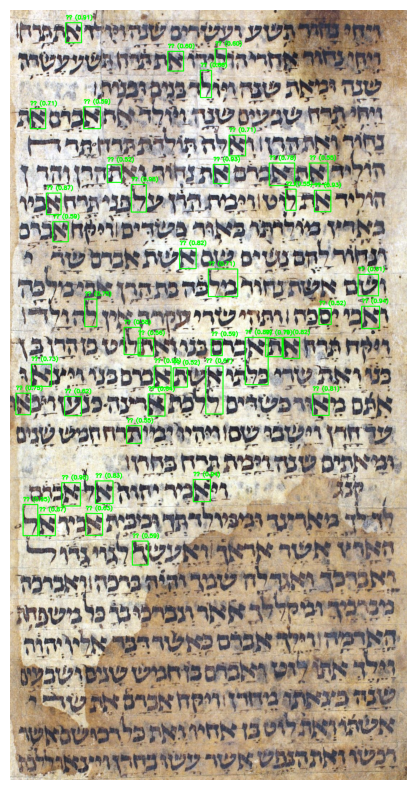

Results saved to detected_letters.xlsx
Annotated image saved to annotated_image.jpg
Letter: ד, Coordinates: (341, 1483, 44, 67), Probability: 0.59
Letter: א, Coordinates: (81, 1409, 45, 59), Probability: 0.87
Letter: א, Coordinates: (211, 1406, 47, 61), Probability: 0.63
Letter: ל, Coordinates: (36, 1381, 41, 87), Probability: 0.95
Letter: א, Coordinates: (144, 1320, 52, 65), Probability: 0.90
Letter: א, Coordinates: (238, 1315, 49, 63), Probability: 0.83
Letter: א, Coordinates: (511, 1311, 48, 62), Probability: 0.94
Letter: ת, Coordinates: (325, 1161, 42, 49), Probability: 0.55
Letter: ע, Coordinates: (152, 1079, 47, 54), Probability: 0.62
Letter: א, Coordinates: (844, 1072, 46, 60), Probability: 0.81
Letter: א, Coordinates: (385, 1072, 47, 62), Probability: 0.64
Letter: א, Coordinates: (16, 1070, 41, 60), Probability: 0.75
Letter: ת, Coordinates: (455, 999, 40, 54), Probability: 0.52
Letter: מ, Coordinates: (546, 994, 48, 134), Probability: 0.67
Letter: א, Coordinates: (402, 994, 47,

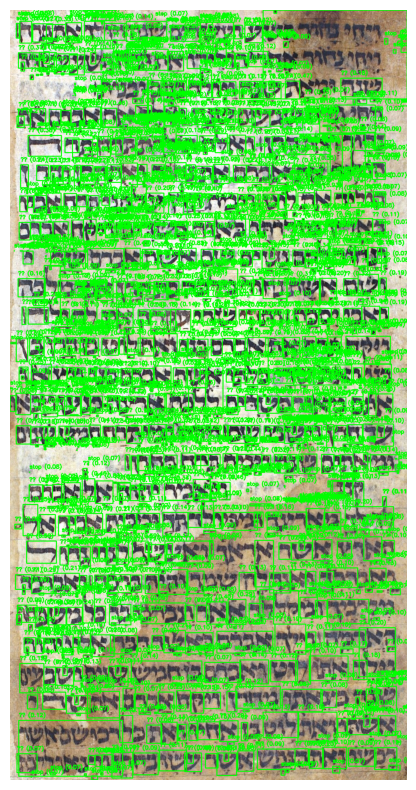

Results saved to detected_letters.xlsx
Annotated image saved to annotated_image.jpg
Letter: stop, Coordinates: (59, 2142, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (1104, 1960, 3, 1), Probability: 0.07
Letter: stop, Coordinates: (1097, 1960, 2, 1), Probability: 0.07
Letter: stop, Coordinates: (1095, 1960, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (1092, 1881, 2, 1), Probability: 0.07
Letter: stop, Coordinates: (1085, 1881, 4, 3), Probability: 0.07
Letter: stop, Coordinates: (80, 1740, 4, 4), Probability: 0.07
Letter: stop, Coordinates: (282, 1574, 2, 1), Probability: 0.07
Letter: stop, Coordinates: (130, 1401, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (358, 1398, 2, 4), Probability: 0.07
Letter: stop, Coordinates: (885, 1390, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (767, 1384, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (766, 1382, 1, 1), Probability: 0.07
Letter: stop, Coordinates: (770, 1381, 1, 4), Probability: 0.07
Letter: stop, Coo

In [6]:
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('hebrew_letter_model.keras')

# Class names for Hebrew letters and stop symbol
class_names = ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']

# Preprocess the image: convert to grayscale, thresholding, and find contours
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for better letter isolation
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Detect lines using horizontal projections or contours
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=2)

    # Find contours for each line
    contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return img, contours

# Process each line individually and filter out bad matches
def process_line(image, line_contour, model, class_names, probability_threshold=0.09, stop_symbol_ratio=1.5):
    x, y, w, h = cv2.boundingRect(line_contour)
    line_image = image[y:y+h, x:x+w]

    # Further segment letters in the line
    gray_line = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
    _, thresh_line = cv2.threshold(gray_line, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh_line, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_letters = []

    for contour in contours:
        # Get bounding box for each letter
        lx, ly, lw, lh = cv2.boundingRect(contour)

        # Ignore contours that are too square (likely part of a Hebrew letter or noise)
        aspect_ratio = lw / float(lh)
        if aspect_ratio > stop_symbol_ratio and aspect_ratio < 1/stop_symbol_ratio:
            continue  # Skip contours that are too square

        letter_image = line_image[ly:ly+lh, lx:lx+lw]

        # Resize the letter image for model input
        letter_image_resized = cv2.resize(letter_image, (64, 64))
        letter_image_array = np.expand_dims(letter_image_resized, axis=0) / 255.0

        # Predict the letter
        predictions = model.predict(letter_image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_letter = class_names[predicted_class]
        probability = np.max(predictions)

        # Only include letters with probability above the threshold
        if probability > probability_threshold:
            detected_letters.append({
                'letter': predicted_letter,
                'coords': (x + lx, y + ly, lw, lh),  # Global coordinates on original image
                'probability': probability
            })

    return detected_letters

# Annotate and highlight letters on the image
def annotate_image(image, detected_letters):
    for letter_info in detected_letters:
        x, y, w, h = letter_info['coords']
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, f'{letter_info["letter"]} ({letter_info["probability"]:.2f})',
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Export detected letters to an Excel file
def export_to_excel(detected_letters, output_file='detected_letters.xlsx'):
    df = pd.DataFrame(detected_letters)
    df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")

# Main function to process image line by line
def process_image_line_by_line(image_path, model, class_names, probability_threshold=0.07, stop_symbol_ratio=1.5):
    img, line_contours = preprocess_image(image_path)
    all_detected_letters = []

    # Process each line separately
    for line_contour in line_contours:
        detected_letters = process_line(img, line_contour, model, class_names, probability_threshold, stop_symbol_ratio)
        all_detected_letters.extend(detected_letters)

    # Annotate the original image with detected letters
    annotated_image = annotate_image(img, all_detected_letters)

    return annotated_image, all_detected_letters

# Load and process the image
image_path = 'sample_image.jpg'  # Replace with your image path
annotated_img, detected_letters = process_image_line_by_line(image_path, model, class_names)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Export the detected letters to an Excel file
export_to_excel(detected_letters)

# Save the annotated image
output_image_path = 'annotated_image.jpg'
cv2.imwrite(output_image_path, annotated_img)
print(f"Annotated image saved to {output_image_path}")

# Print detected letters with coordinates and probabilities
for letter_info in detected_letters:
    print(f"Letter: {letter_info['letter']}, Coordinates: {letter_info['coords']}, Probability: {letter_info['probability']:.2f}")


# Export function to Text

In [8]:
import xml.etree.ElementTree as ET

In [15]:
# Function to export results as a text file
def export_to_text_file(detected_letters, output_file='detected_letters.txt'):
    lines_dict = {}

    # Group letters by their line (y-coordinate)
    for letter_info in detected_letters:
        # Extract the y-coordinate of the letter's bounding box
        x, y, w, h = letter_info['coords']
        line_key = y // 50  # Grouping based on line height (~50 pixels, adjust as necessary)

        # Replace "stop" with the actual stop symbol "."
        letter = letter_info['letter']
        if letter == "stop":
            letter = "."

        if line_key not in lines_dict:
            lines_dict[line_key] = []

        lines_dict[line_key].append(letter)

    # Write letters from each line to the text file
    with open(output_file, 'w', encoding='utf-8') as f:
        for line_key in sorted(lines_dict.keys()):
            # Join letters from the same line
            f.write("".join(lines_dict[line_key]) + '\n')

    print(f"Results saved to {output_file}")

# Export to TEI-XML

In [17]:
import xml.etree.ElementTree as ET

# Function to export results as TEI-XML, including alternative letters and their probabilities
def export_to_tei_xml(detected_letters, model, class_names, output_file='detected_letters.xml'):
    # Create the root element of the TEI-XML
    tei = ET.Element("TEI")
    text = ET.SubElement(tei, "text")
    body = ET.SubElement(text, "body")

    for letter_info in detected_letters:
        x, y, w, h = letter_info['coords']
        letter = letter_info['letter']
        probability = letter_info['probability']
        letter_image = letter_info['image']  # Assuming the letter_image is included in detected_letters

        # Create an element for the letter with attributes
        lb = ET.SubElement(body, "lb", attrib={
            "x": str(x),
            "y": str(y),
            "width": str(w),
            "height": str(h),
            "probability": f"{probability:.2f}"
        })
        lb.text = letter

        # Get alternatives with their probabilities
        letter_image_resized = cv2.resize(letter_image, (64, 64))  # Resize the letter image
        letter_image_array = np.expand_dims(letter_image_resized, axis=0) / 255.0
        predictions = model.predict(letter_image_array)
        sorted_predictions = sorted(enumerate(predictions[0]), key=lambda x: -x[1])

        # Add alternative letters with probabilities (Top 3 alternatives)
        for i, prob in sorted_predictions[1:4]:  # Exclude the main prediction
            alt_letter = class_names[i]
            alt_elem = ET.SubElement(lb, "alt", attrib={"letter": alt_letter, "probability": f"{prob:.2f}"})

    # Write TEI-XML to file
    tree = ET.ElementTree(tei)
    tree.write(output_file, encoding='utf-8', xml_declaration=True)
    print(f"TEI-XML saved to {output_file}")


# Export to Text

In [16]:
# Export to text file
export_to_text_file(detected_letters)

Results saved to detected_letters.txt


# Export to TEI-XML

In [18]:
# Export to TEI-XML file
export_to_tei_xml(detected_letters, model, class_names)


KeyError: 'image'